In [1]:
from operator import mul
import networkx as nx
import community
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.colors as mpcolors
import matplotlib.cm as mpcm
import numpy as np
import pandas as pd
from networkx.algorithms.community.centrality import girvan_newman
from networkx import edge_betweenness_centrality

In [2]:
pdEdge = pd.read_csv('Dataset.csv')
pdEdge = pdEdge[:200]
pdEdge

,waktu,id_tweet,count_retweet,count_likes,id_account_twitter,username,full_name,followers,following,location,tweet
0,2021-12-23 10:18:11,1473961122684276736,0,0,1284042528082112512,MarkLouieSanPe2,Mark Louie San Pedro,0,0,NaN,Blacklist deserve Estes M3 Skin\n\n#WeWantEste...
1,2021-12-23 10:11:41,1473959487622959108,0,0,2427400357,abbyberrie,Abby Em,48,49,Philippines,Tweeting again supporting @BLACKLISTINTL chose...
2,2021-12-23 09:17:32,1473945859033157633,0,0,808879273788309504,purplewitty099,Vivi09,112,208,NaN,👎🏻 #WeWantEstes If #Moonton @MobileLegendsOL ...
3,2021-12-23 09:17:19,1473945804867989505,1,0,1326929379163693056,gfriendsakalam,BAHIYYIH,8,24,NaN,RT @purplewitty099: 👎🏻 #WeWantEstes If #Moonto...
4,2021-12-23 09:15:38,1473945381532684290,1,1,808879273788309504,purplewitty099,Vivi09,112,208,NaN,👎🏻 #WeWantEstes If #Moonton @MobileLegendsOL ...
...,...,...,...,...,...,...,...,...,...,...,...
195,2021-12-20 13:54:30,1472928397848309764,7,0,1326922542762909696,sun33vvv,beau🥃,526,153,"blckwvls, vcds",RT @just_cutieca: M3 is done and I am so happy...
196,2021-12-20 13:50:23,1472927363818471428,17,0,1451596421505773570,MarieArr2,Jharie🐷,57,364,NaN,RT @roxytociiin: Appreciation for Hadji:\nDumo...
197,2021-12-20 13:46:00,1472926258157826048,0,0,718648027842367488,aTypicalGeekguy,#NoToMarcosDuterte2022,558,418,go check my pinned tweet,ARTWORK Smart Move (Coin Purse)\n\nprice: 199 ...
198,2021-12-20 13:45:06,1472926031762042884,337,0,131469483,toberTheGreat_,kyah tubeeer 🤪,392,132,"Binangonan, Calabarzon",RT @MirkoCasts: Blacklist what the heck?!?!\n#...


In [3]:
# load the karate club graph
G = nx.karate_club_graph()
for i in range(0,len(pdEdge)):
  G.add_edge(pdEdge['username'].loc[i],pdEdge['tweet'].loc[i])

communities = girvan_newman(G)

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33], ['MarkLouieSanPe2', 'Blacklist deserve Estes M3 Skin\n\n#WeWantEstesSkin \n#Blacklistinternational \n#Moonton \n#MobileLegendsBangBang… https://t.co/HxSOZ5aeuN'], ['abbyberrie', 'Tweeting again supporting @BLACKLISTINTL chosen skin for #M3WorldChampionship \nGive respect.\n\n #WeWantEstes'], ['@MobileLegendsOL 👎🏻 #WeWantEstes If #Moonton @MobileLegendsOL  #M3WorldChampionship is not true to their words then… https://t.co/8Vb0ecSwTf', '👎🏻 #WeWantEstes If #Moonton @MobileLegendsOL  #M3WorldChampionship is not true to their words then we should… https://t.co/CiGyWNQtlQ', '👎🏻 #WeWantEstes If #Moonton @MobileLegendsOL  #M3WorldChampionship is not true to their words then we should… https://t.co/vjRy63grMG', '@MobileLegendsOL 👎🏻 #WeWantEstes If #Moonton @MobileLegendsOL  #M3WorldChampionship is not true to their words then… https://t.co/djPw3Z2XTC', '👎🏻 #WeWantEste

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128078 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127995 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9917 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128071 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 129300 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128073 missing from current font.
  font.

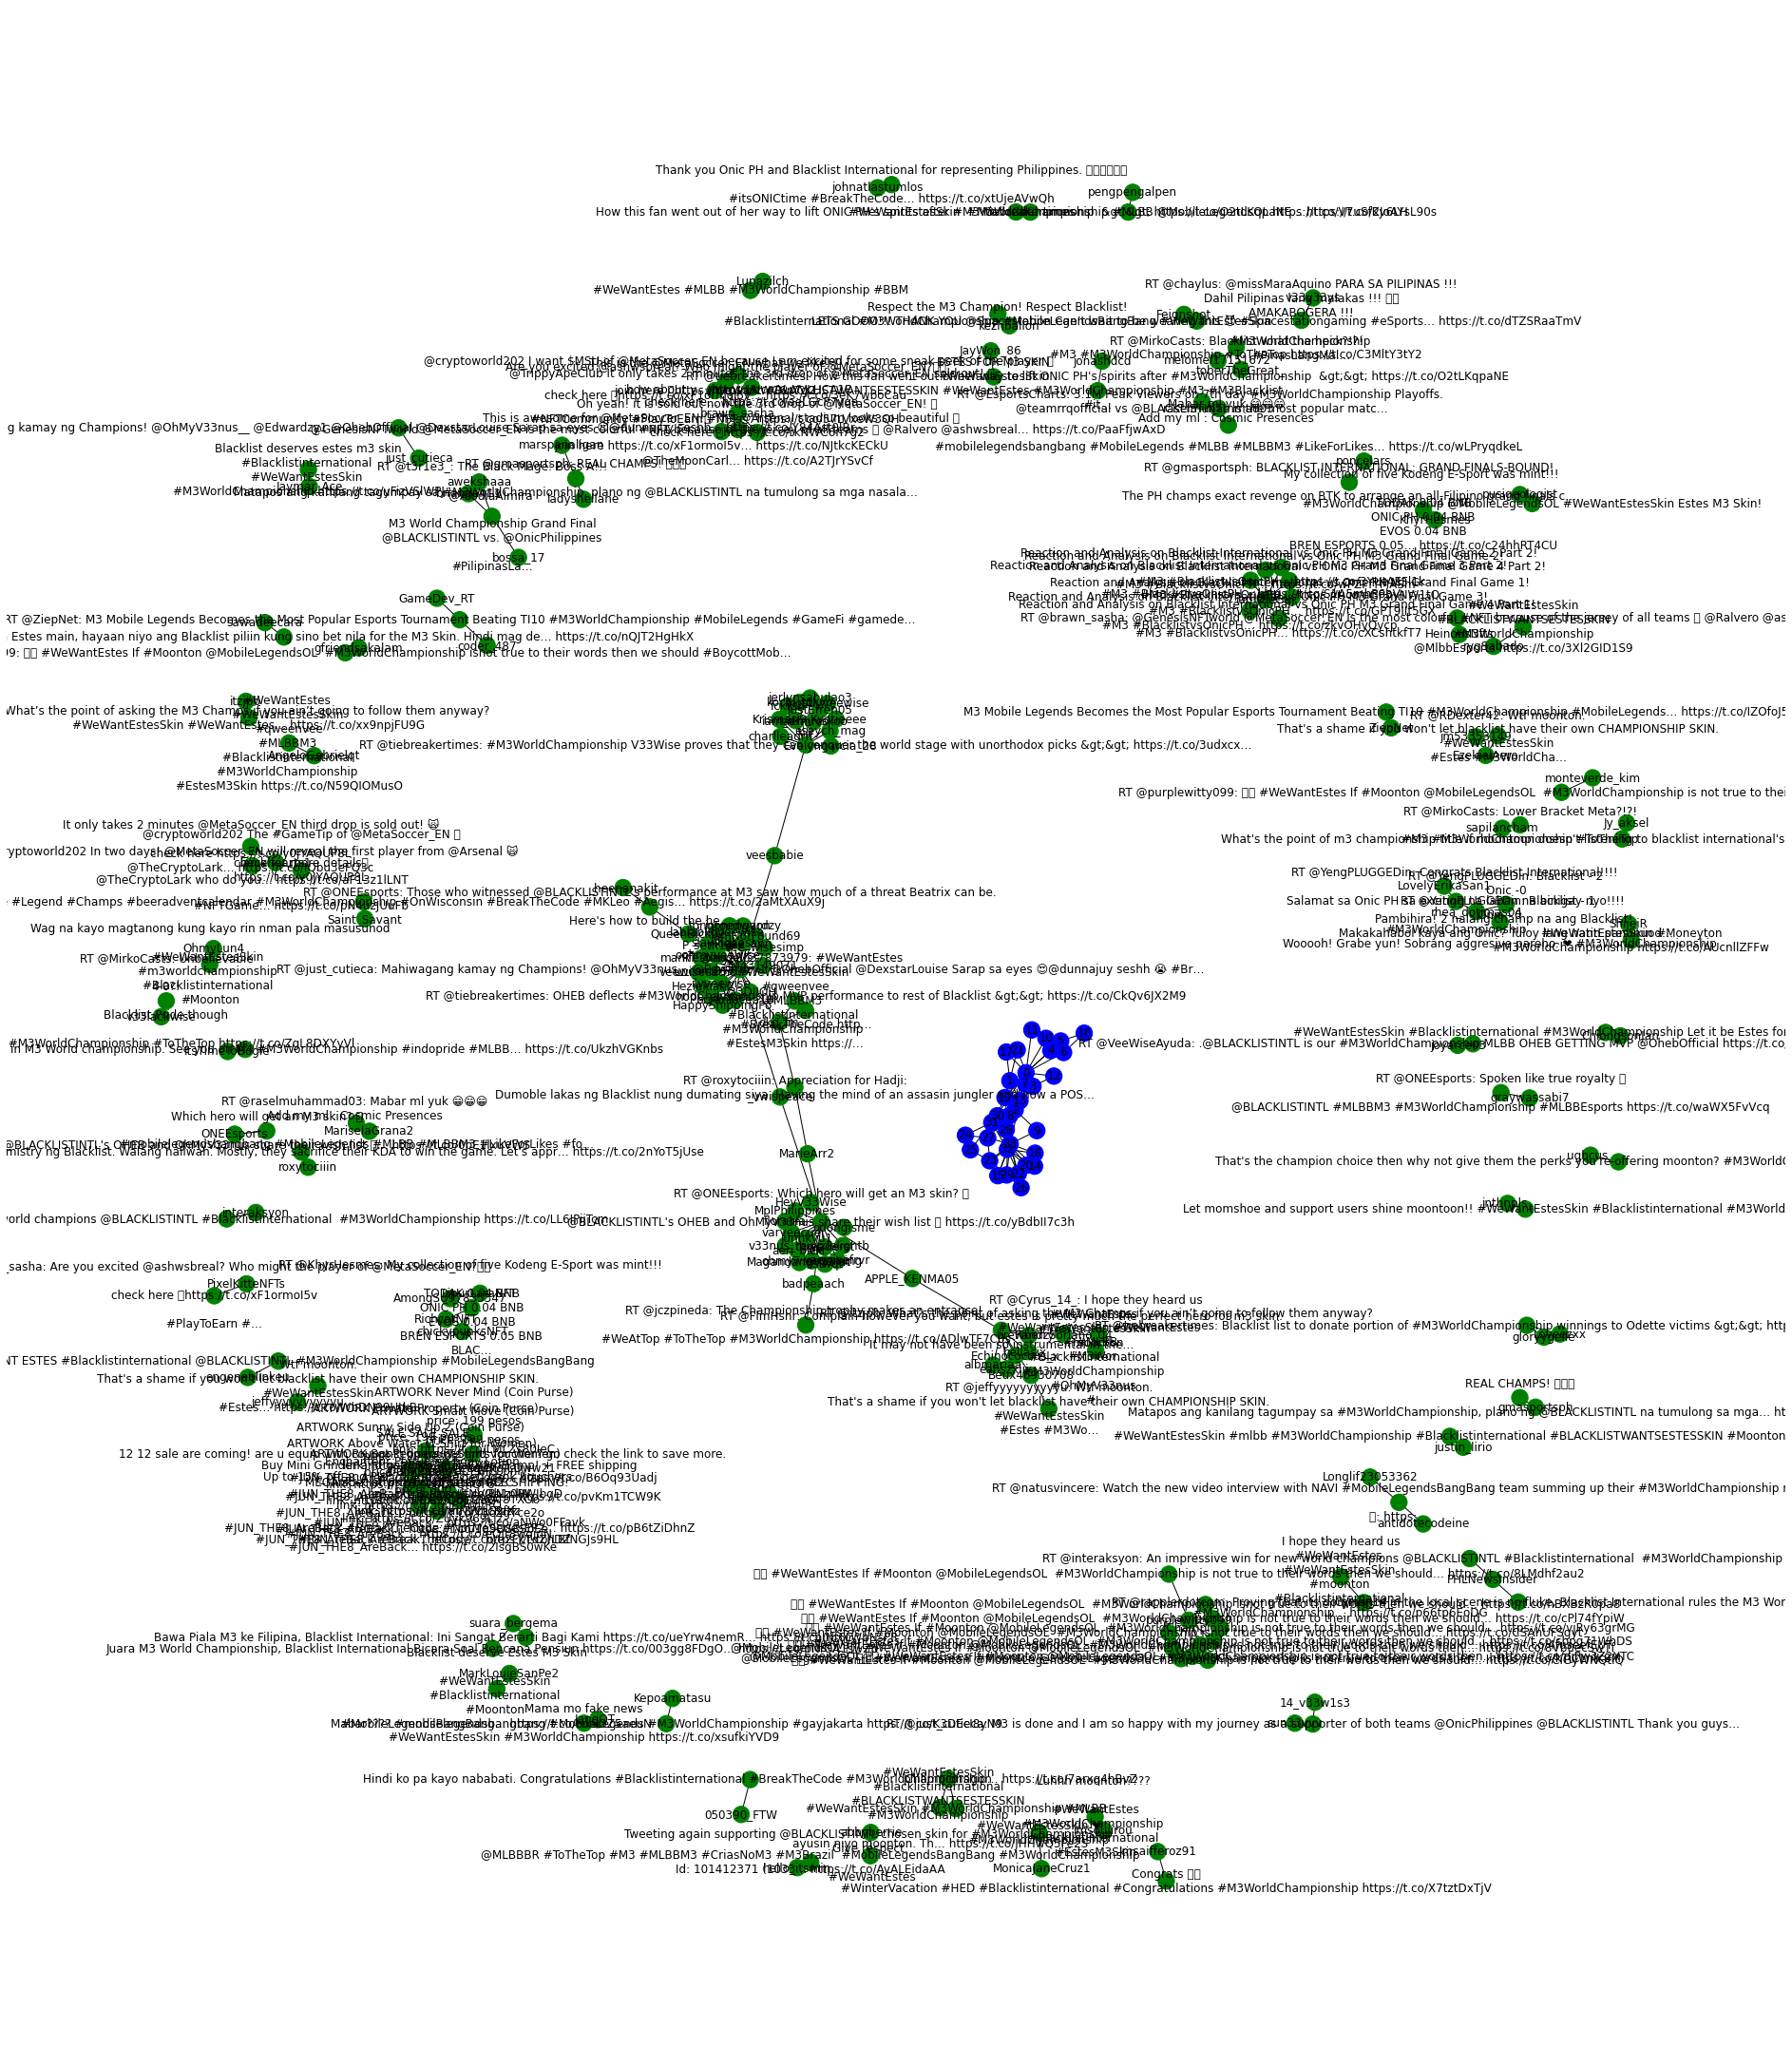

In [4]:
fig = plt.figure(figsize=(26, 30)) 
node_groups = []
for com in next(communities):
  node_groups.append(list(com))

print(node_groups)

color_map = []
for node in G:
    if node in node_groups[0]:
        color_map.append('blue')
    else: 
        color_map.append('green')  
nx.draw(G, node_color=color_map, with_labels=True)
plt.show()

In [9]:
#function untuk menghitung degree dari graph
def calculate_degree(gpd,n = 0):
    funcdegree = []
    funcNode= []
    for node in gpd.nodes():
        tempD = gpd.degree(node)
        if tempD >= n : funcdegree.append(tempD),funcNode.append(node)
    
    return funcdegree,funcNode

In [6]:
gpdDegree, gpdNode = calculate_degree(G,0)

In [10]:
#maximun & minumum degree dari node
print('Maximum Degree :', max(gpdDegree))
print('Minimum Degree :', min(gpdDegree))

data = {'Node' : gpdNode,
        'Degree' : gpdDegree}
df_Nodecc = pd.DataFrame(data)

Maximum Degree : 23
Minimum Degree : 1


In [11]:
# The maximum width in characters of a column in the repr of a pandas data structure
df_Nodecc.sort_values(by=['Degree'], inplace=True, ascending=False)
df_Nodecc.head(1)

,Node,Degree
146,RT @just_cutieca: Mahiwagang kamay ng Champion...,23
